In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


<h2>Understanding the various features (columns) of the dataset.</h2>

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

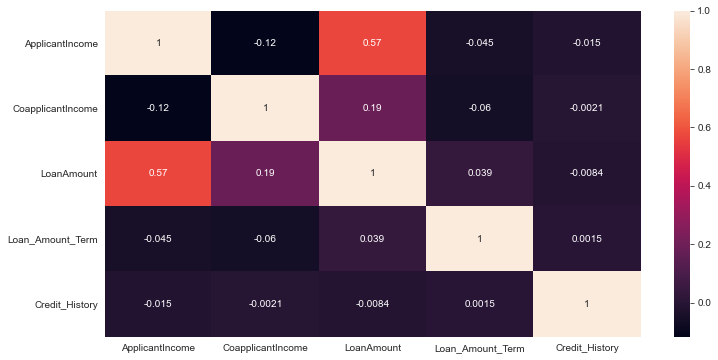

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [7]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Text(0.5, 0, 'Applicant Income')

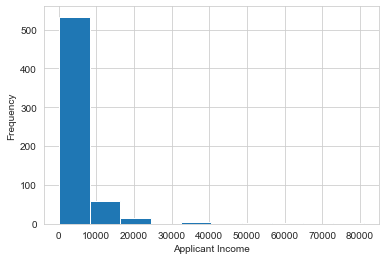

In [10]:
sns.set_style('whitegrid')
df['ApplicantIncome'].plot(kind='hist')
plt.xlabel('Applicant Income')

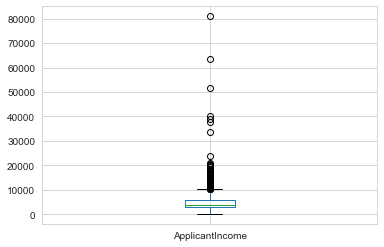

In [12]:
df.boxplot(column='ApplicantIncome')
#There are some outliers...


Text(0, 0.5, 'Applicant Income')

<Figure size 1152x576 with 0 Axes>

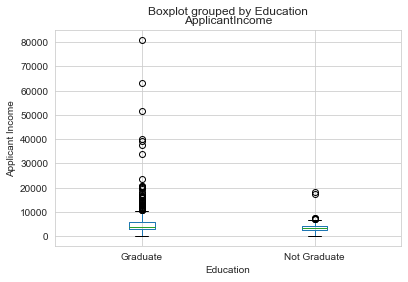

In [22]:
plt.figure(figsize=(16,8))
df.boxplot(column='ApplicantIncome',by='Education')
plt.ylabel('Applicant Income')

Text(0.5, 0, 'Loan Amount')

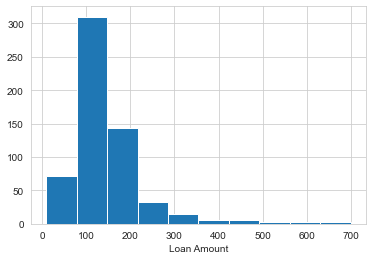

In [24]:
df['LoanAmount'].hist()
plt.xlabel('Loan Amount')

Text(0, 0.5, 'Loan Amount')

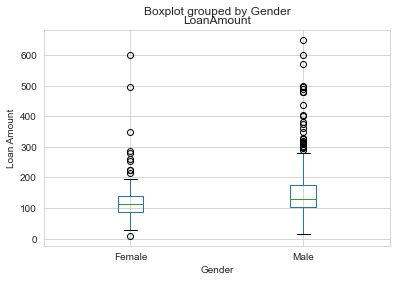

In [26]:
df.boxplot(column='LoanAmount', by = 'Gender')
plt.ylabel('Loan Amount')

<h3>Understanding Categorical Variables : </h3>

In [34]:
loan_app=df['Loan_Status'].value_counts()['Y']
loan_app
#Print total number of loan approvals

422

In [35]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [36]:
df['Self_Employed'].fillna('No',inplace=True)

Text(0.5, 0, 'Loan Amount')

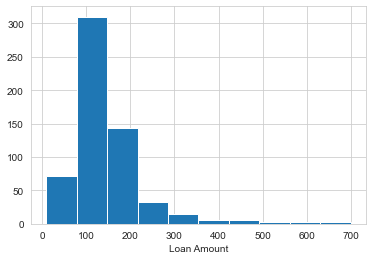

In [38]:
df['LoanAmount'].hist()
plt.xlabel('Loan Amount')

In [39]:
# Impute missing values for Gender
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


In [43]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [52]:
# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int32
dtype: object

In [53]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


In [54]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [55]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [56]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<h2> Train and Test Of Model : </h2>

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [51]:
lm=LogisticRegression()

In [58]:
X=df.drop(['Loan_Status','Loan_ID'],axis=1)
y=df['Loan_Status']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
lm.fit(X_train,y_train)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
predict=lm.predict(X_test)

In [67]:
df1=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predict})
df1.head(10)

l=[]
for x in predict:
    if x==1:
        l.append('Approved')
    else:
        l.append('Not Approved')
df1['Loan_Approval_Status']=l
df1.head(10)

,Actual Value,Predicted Value,Loan_Approval_Status
216,0,1,Approved
55,1,1,Approved
593,1,1,Approved
438,0,0,Not Approved
351,0,1,Approved
128,0,0,Not Approved
212,1,1,Approved
317,1,1,Approved
489,0,1,Approved
106,1,1,Approved


<h2>Metrics:</h2>

In [69]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.41      0.56        64
           1       0.76      0.98      0.85       121

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.80      0.78      0.75       185



In [70]:
print(confusion_matrix(y_test,predict))

[[ 26  38]
 [  3 118]]
